In [2]:
import keras.backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image

In [3]:
classes = ['apple', 'empty', 'garlic','lemon','mug']
path = 'data/'

In [4]:
# define an image data generator
data_gen = preprocessing.image.ImageDataGenerator(
    # define the preprocessing function that should be applied to all images
    preprocessing_function=mobilenet_v2.preprocess_input,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #horizontal_flip=True,
    #vertical_flip=True,
    # zoom_range=0.2,
    #shear_range=0.2
    validation_split=0.2
)
train_batches = data_gen.flow_from_directory(
    directory=path,
    class_mode='categorical',
    classes=classes,
    batch_size=64,
    target_size=(224, 224),
    subset='training'
)
validation_batches = data_gen.flow_from_directory(
    directory=path,
    class_mode='categorical',
    classes=classes,
    batch_size=64,
    target_size=(224, 224),
    subset='validation'
)

Found 3230 images belonging to 5 classes.
Found 805 images belonging to 5 classes.


In [5]:
xtrain, ytrain = next(train_batches)
xtrain.shape, ytrain.shape
def plotImages(images_arr):
    fig, axes = plt.subplots(6, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

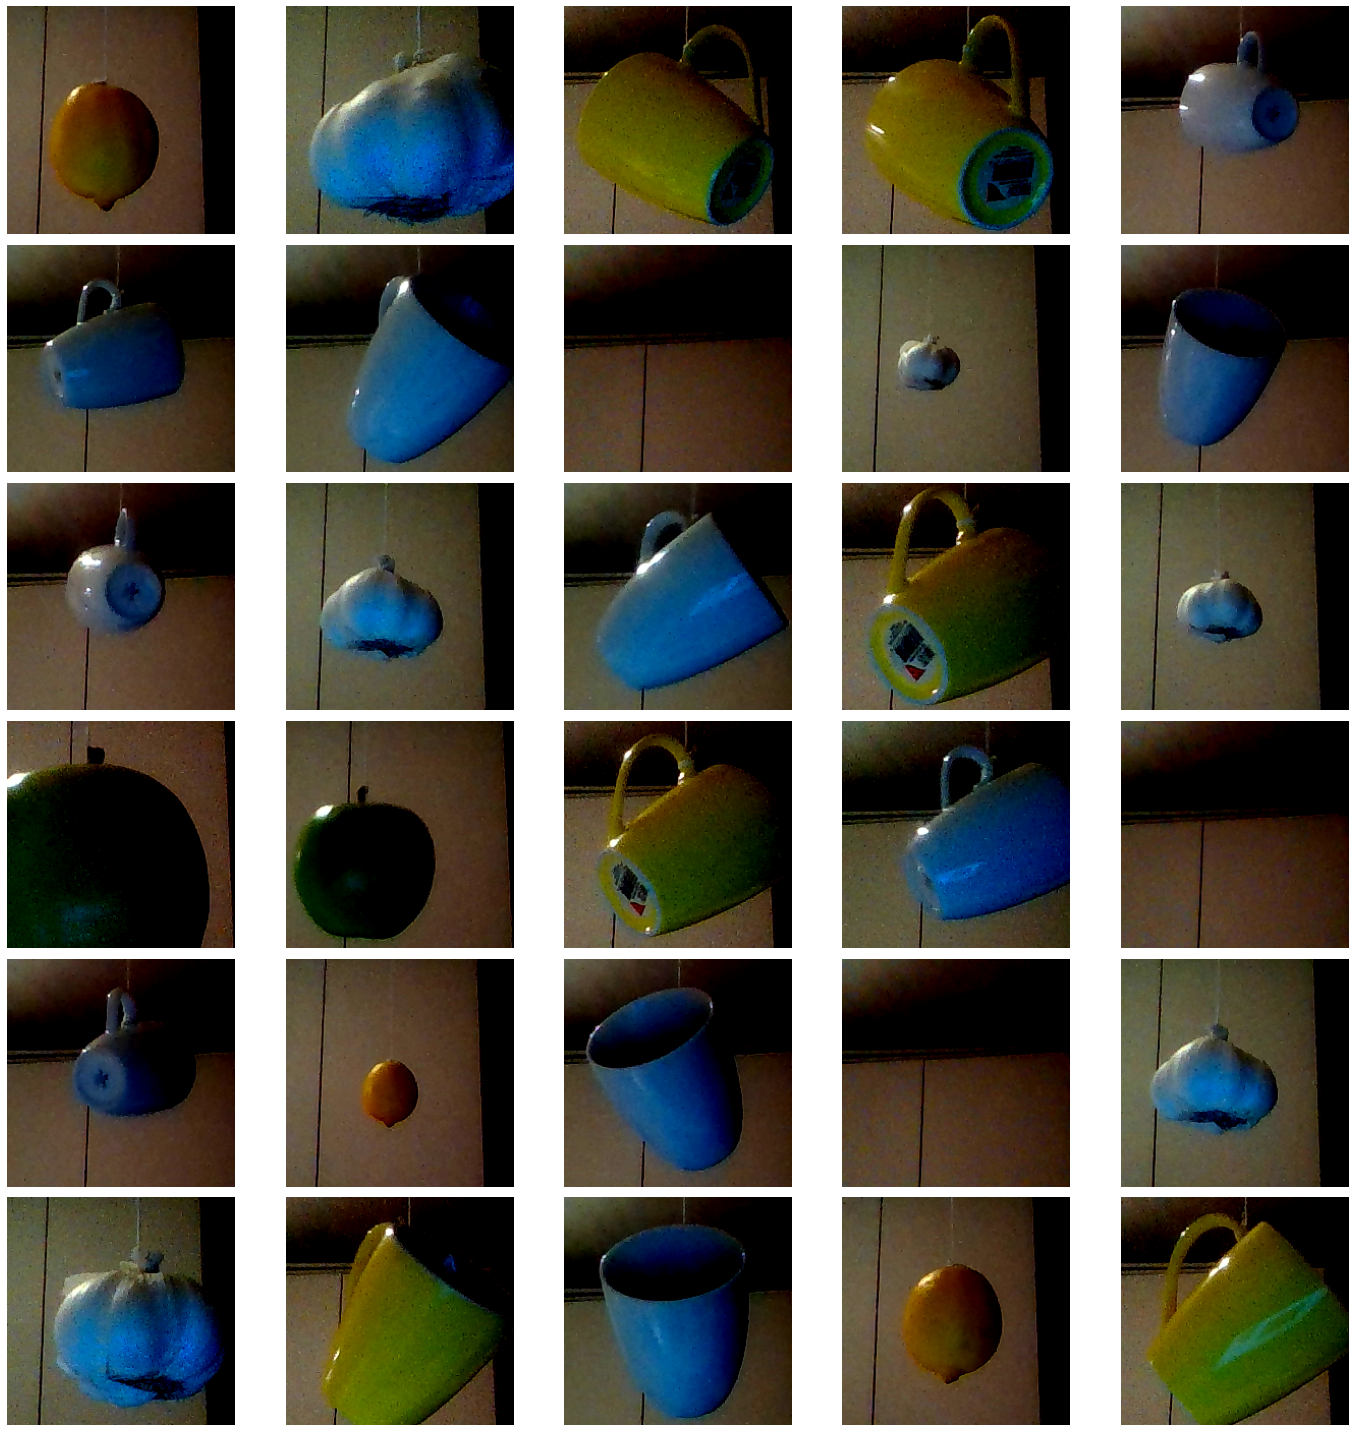

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0.

In [6]:
plotImages(xtrain)
print(ytrain)

In [7]:
## Create CNN Model
#Base model
base_model = mobilenet_v2.MobileNetV2(
    weights='imagenet',
    alpha=0.35,         # specific parameter of this model, small alpha reduces the number of overall weights
    pooling='avg',      # applies global average pooling to the output of the last conv layer (like a flattening)
    include_top=False,  # !!!!! we only want to have the base, not the final dense layers
    input_shape=(224, 224, 3)
)

2022-02-12 09:53:36.811196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/damoon/anaconda3/envs/deep_learning/lib/python3.8/site-packages/cv2/../../lib64:
2022-02-12 09:53:36.811268: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-12 09:53:36.811301: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Jaguar): /proc/driver/nvidia/version does not exist
2022-02-12 09:53:36.818410: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# freeze it!
base_model.trainable = False

In [9]:
len(classes)
model = keras.Sequential()
model.add(base_model)
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(len(classes), activation='softmax')) #!!! Final layer with a length of 2, and softmax activation
# have a look at the trainable and non-trainable params statistic
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_0.35_224 (Funct  (None, 1280)             410208    
 ional)                                                          
                                                                 
 dense (Dense)               (None, 100)               128100    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 538,813
Trainable params: 128,605
Non-trainable params: 410,208
_________________________________________________________________


In [14]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

# observe the validation loss and stop when it does not improve after 3 iterations
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


hist = model.fit(
    train_batches,
    validation_data = validation_batches,
    epochs = 10)


Epoch 1/10
51/51 [==============================] - 91s 2s/step - loss: 0.0019 - categorical_accuracy: 0.9997 - val_loss: 7.6070e-04 - val_categorical_accuracy: 1.0000
Epoch 2/10
51/51 [==============================] - 136s 2s/step - loss: 0.0021 - categorical_accuracy: 0.9994 - val_loss: 0.0010 - val_categorical_accuracy: 1.0000
Epoch 3/10
51/51 [==============================] - 97s 2s/step - loss: 0.0010 - categorical_accuracy: 0.9997 - val_loss: 1.2997e-04 - val_categorical_accuracy: 1.0000
Epoch 4/10
51/51 [==============================] - 103s 2s/step - loss: 0.0010 - categorical_accuracy: 0.9997 - val_loss: 1.3121e-04 - val_categorical_accuracy: 1.0000
Epoch 5/10
51/51 [==============================] - 89s 2s/step - loss: 3.2590e-04 - categorical_accuracy: 1.0000 - val_loss: 3.4469e-05 - val_categorical_accuracy: 1.0000
Epoch 6/10
51/51 [==============================] - 71s 1s/step - loss: 1.1793e-04 - categorical_accuracy: 1.0000 - val_loss: 6.4917e-05 - val_categorical_acc

In [13]:
hist

import keras.backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image
import keras.backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import cv2
import m

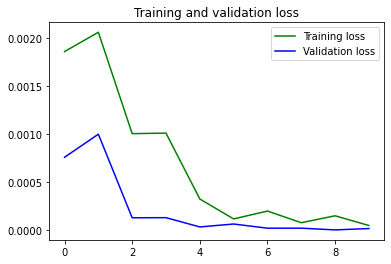

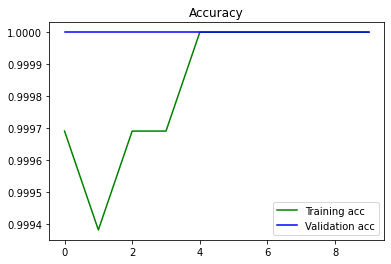

In [15]:
# Display models statistics
from matplotlib import pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['categorical_accuracy']
val_acc = hist.history['val_categorical_accuracy']
epochsr = range(10)
plt.figure()
plt.plot(epochsr, loss, 'g', label='Training loss')
plt.plot(epochsr, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochsr, acc, 'g', label='Training acc')
plt.plot(epochsr, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.show()
mymodel = hist.model